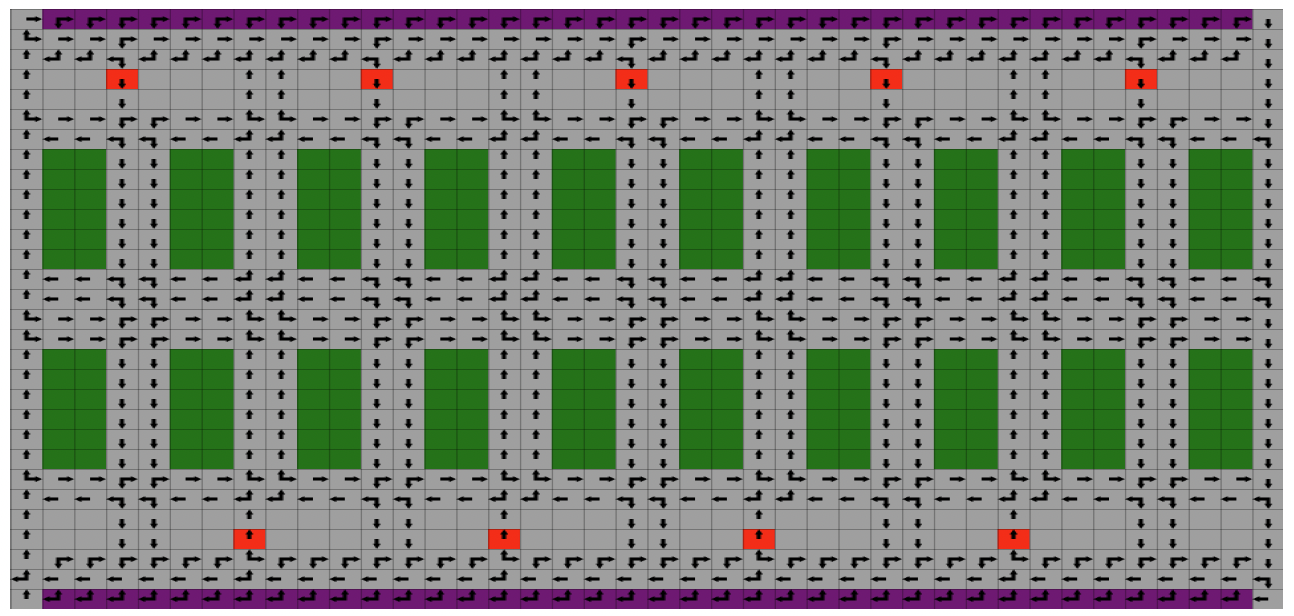

In [1]:
from IPython.display import Image
Image("참고 공장 모델.png")
#Research on the Collision-Free Path Planning of
#Multi-AGVs System Based on Improved A*
#Algorithm
#Ruiping Yuan, Tingting Dong, Juntao Li
#의 논문 참조

In [2]:
class SHELF :
    def __init__(self) :
        self.products = []
    
    # 선반에 상품을 적재함
    def push(self, product) :
        self.products.append(product)
        
    # 선반에 상품을 추출함 (선반에 해당 상품이 2개 이상 있는 경우 가장 먼저 들어온 상품을 추출함)
    def pop(self, product) :
        for i in range(len(self.products)) :
            if self.products[i].code == product.code :
                del self.products[i]
                return
    # 선반에 물건이 몇개 들어있는 알려준다.
    def stuffed(self) :
        return len(self.products)
    
    #데이터 보여주기용 함수
    def show(self) :
        if len(self.products) == 0 :
            print("EMPTY")
        for product in self.products :
            print(product)
        print()
        
        
    
class PRODUCT :
    #  현재 단계에서 잘모르는 데이터에 대해서는 defalut 값으로 처리함
    def __init__(self, code, name, ABC = 1, x = 0, y = 0, z = 0, g = 0) :
        self.code = code
        self.name = name
        self.ABC = ABC
        self.x = x
        self.y = y
        self.z = z
        self.g = g
    def __repr__(self) :
        return f"code = {self.code}, name = {self.name}"
        

class MAP :
    # 워크스테이션 당 맡게 되는 선반의 개수를 일관되게 유지하기 위해서
    # 가로, 세로가 n,m 으로 주어진 경우 공장 크기는 n*8, 10 + m*10 으로 생성됨

    def __init__(self,R=2,C=5,K=987654321) :
        if R < 1 or C < 1: 
            raise ValueError("공장 크기가 적절하지 않습니다.\n")
        R *= 10
        R += 10
        C *= 8
        self.R = R
        self.C = C
        self.K = K
        self.idx = 1
        self.map = [[0]*C for _ in range(R)]
        self.products_in_shelves = {}
        
        # 워크스테이션 설정
        for c in range(3,C,8) :
            self.map[3][c] = -1
        for c in range(7,C-4,8) :
            self.map[R-4][c] = -1
            
        # 선반 설정
        break_point = False
        for c in range(1,self.C-2,4) :
            if break_point : break
            for r in range(7,self.R-10,10) :
                if break_point : break
                for dc in range(2) :
                    if break_point : break
                    for dr in range(6) :
                        cr = r + dr
                        cc = c + dc 
                        self.map[cr][cc] = self.idx
                        self.idx += 1
                        if self.idx > K :
                            break_point = True
                            break
        
        # 선반 배열 생성
        self.shelves = [SHELF() for _ in range(self.idx)]
            
    # 해당 인덱스를 가진 선반에 물건을 넣는다.
    def push(self, product, idx = 0) :
        # 인덱스가 변수로 주어져 있지 않다면 비어있는 선반을 찾아서 적재한다.
        if idx == 0 :
            Full = True
            for i in range(1,self.idx) :
                if self.shelves[i].stuffed() < 60 :
                    idx = i
                    Full = False
                    break
            if Full :
                print("모든 선반에 물건이 차있기 때문에 적재할 수 없습니다.\n")
                return
        # 해당 선반에 물품을 적재한다. 
        self.shelves[idx].push(product)
        if product.code in self.products_in_shelves.keys() :
            self.products_in_shelves[product.code][idx] += 1
        else :
            self.products_in_shelves[product.code] = [0 for _ in range(self.idx)]
            self.products_in_shelves[product.code][idx] += 1
        print(f"{product.name} 이 {idx} 번째 선반에 적재되었습니다.\n")
            
    def show_product(self, product) :
        if product.code not in self.products_in_shelves.keys() or sum(self.products_in_shelves[product.code]) == 0:
            print(f"{product.name} 이 공장에 존재하지 않습니다.\n")
            return
        print(f"상품명 : {product.name}")
        for idx,cnt in enumerate(self.products_in_shelves[product.code]) :
            if cnt == 0 :
                continue
            print(f"{idx}번 선반 - {cnt} 개")
        print()
    
    # 해당 인덱스를 가진 선반에서 물건을 뺀다.
    def pop(self, product, idx = 0) :
        # 상품이 공장에 존재하지 않는 경우
        if product.code not in self.products_in_shelves.keys() or sum(self.products_in_shelves[product.code]) == 0:
            print(f"{product.name} 이 공장에 존재하지 않습니다.\n")
            return
        
        # 상품이 공장에 존재하나 인덱스가 주어지지 않은 경우 자동으로 인덱스를 구함
        if idx == 0 :
            for i,cnt in enumerate(self.products_in_shelves[product.code]) :
                if cnt > 0 :
                    idx = i
                    break
        
        # 상품이 공장에 존재하고 인덱스가 주어진 경우인데도 해당 선반에 상품이 존재하지 않은 경우
        if self.products_in_shelves[product.code][idx] == 0 :
            print(f"{product.name} 이 해당 선반에 존재하지 않습니다.")
            return
        
        print(f"{product.name} 이 {idx} 번째 선반에 추출되었습니다.\n")
        self.products_in_shelves[product.code][idx] -= 1
        self.shelves[idx].pop(product)
             
    # 해당 인덱스를 가진 선반이 어떤 물건을 가지고 있는지 보여준다.
    def show_nth_shelf(self, idx) :
        print(f"{idx} 번째 선반에 들어있는 상품 : ")
        self.shelves[idx].show()

    
    def __repr__(self):
        ret = ''
        ret += f"R : {self.R} C : {self.C}\n"
        for r in range(self.R) :
            for c in range(self.C) :
                ret += str(self.map[r][c]) + " "*(len(str(self.idx)) - len(str(self.map[r][c])) + 1)
            ret += '\n'
        return ret
    
    # 선반과 워크스테이션만을 보여주는 직관적인 뷰
    def show(self) :
        print(f"R : {self.R} C : {self.C}\n")
        for r in range(self.R) :
            for c in range(self.C) :
                if self.map[r][c] == -1 :
                    print('W', end = ' ')
                elif self.map[r][c] > 0 :
                    print("@", end = ' ')
                else : print('-', end = ' ')
            print("\n")

In [3]:
# 사용예시
# 맵 생성
# 인풋 : 공장의 세로, 가로 : 공장 크기는 가로*8, 10+세로*10 으로 생성됨
M = MAP(1,1)

# 공장의 형태 확인 - 양의 자연수 = 선반의 인덱스, -1 = 워크스테이션
print(M)

# 공장의 형태 확인 - @ = 선반, W = 워크스테이션
M.show()

# 상품 적재 - 인풋 : 적재할 상품, 적재할 선반의 인덱스(인덱스가 주어져있지 않은 경우 비어있는 선반을 찾아 적재함)
M.push(PRODUCT("001", "치약"))

# 선반에 적재된 상품 확인 - 인풋 : 선반의 인덱스
# 해당 선반에 적재되어있는 상품 정보를 알려줌
M.show_nth_shelf(1)

# 상품이 적재된 선반 확인 - 인풋 : 상품
M.show_product(PRODUCT("001", "치약"))

# 상품 추출 - 인풋 : 추출할 상품, 해당 상품이 있는 인덱스(인덱스가 주어져 있지 않은 경우 상품이 적재되어 있는 선반을 찾아 추출함)
M.pop(PRODUCT("001", "치약"))

# 추출되었는 확인
M.show_nth_shelf(1)
M.show_product(PRODUCT("001", "치약"))

R : 20 C : 8
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  -1 0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  1  7  0  0  13 19 0  
0  2  8  0  0  14 20 0  
0  3  9  0  0  15 21 0  
0  4  10 0  0  16 22 0  
0  5  11 0  0  17 23 0  
0  6  12 0  0  18 24 0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  

R : 20 C : 8

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- - - W - - - - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- @ @ - - @ @ - 

- @ @ - - @ @ - 

- @ @ - - @ @ - 

- @ @ - - @ @ - 

- @ @ - - @ @ - 

- @ @ - - @ @ - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

- - - - - - - - 

치약 이 1 번째 선반에 적재되었습니다.

1 번째 선반에 들어있는 상품 : 
code = 001, name = 치약

상품명 : 치약
1번 선반 - 1 개

치약 이 1 번째 선반에 추출되었습니다.


In [4]:
import pandas as pd
# 주문 데이터를 불러들이고 확인
order_data = pd.read_csv("productInformation.csv")
order_data

Unnamed: 0            상품코드                               상품 ABC  \
0               0    802980111116                        히말라야 핑크솔트   B   
1               1   6261108117326                      샤프란 향신료 20g   A   
2               2   5285001951833  Elegance Plus Shaving Gel 500ml   C   
3               3   8000070021341             원두커피: 3. 라바짜 그란에스프레소   A   
4               4       VD-MT-002        악역의 엔딩은 죽음뿐 마스킹 테이프 vol.2   A   
...           ...             ...                              ...  ..   
40270       40270  RM204S007WH230                       윈드레이서 스프리트   B   
40271       40271     RM204J014GN            레이 앤 필 스터드 세트 GREEN_F   C   
40272       40272     RM204J012PC         하트 스테이트 펜던트 넥크리스 PEACH_F   A   
40273       40273     RM204J018YE            하트 크리스탈 넥크리스 YELLOW_F   C   
40274       40274             NaN                              NaN   C   

       단품가로(mm)  단품세로(mm)  단품높이(mm)  중량(g)  
0            60        71        38    135  
1            64        94        91      8  
2            64        49        31     88  
3            91        20        23     44  
4            15        53        64     24  
...         ...       ...       ...    ...  
40270        86         5        72      7  
40271        27        38        62    139  
40272        12        29        85    153  
40273        53         2        32    198  
40274         3        89        25     70  

[40275 rows x 8 columns]

In [5]:
# 인풋 : 맵 클래스, 상품 데이터가 저장된 csv 파일
# 상품 데이터를 불러와 맵에 적재해 줌
def push_orders(M, name, head = 0) :
    order_data = pd.read_csv(name)
    if head > 0 :
        order_data = order_data[:head]
    columns = ['상품코드', '상품', 'ABC', '단품가로(mm)', '단품세로(mm)', '단품높이(mm)','중량(g)']
    for i in range(len(order_data)) :
        product = PRODUCT(order_data.loc[i][columns[0]], order_data.loc[i][columns[1]], order_data.loc[i][columns[2]], 
                         order_data.loc[i][columns[3]], order_data.loc[i][columns[4]], order_data.loc[i][columns[5]], 
                         order_data.loc[i][columns[6]])
        M.push(product)
    
# 인풋 : 맵 클래스, 상품 데이터가 저장된 csv 파일
# 상품 데이터를 풀러와 맵에서 추출해 줌
def pop_orders(M, name, head = 0) :
    order_data = pd.read_csv(name)
    if head > 0 :
        order_data = order_data[:head]
    columns = ['상품코드', '상품', 'ABC', '단품가로(mm)', '단품세로(mm)', '단품높이(mm)','중량(g)']
    for i in range(len(order_data)) :
        product = PRODUCT(order_data.loc[i][columns[0]], order_data.loc[i][columns[1]], order_data.loc[i][columns[2]], 
                         order_data.loc[i][columns[3]], order_data.loc[i][columns[4]], order_data.loc[i][columns[5]], 
                         order_data.loc[i][columns[6]])
        M.pop(product)

In [6]:
# 사용예시
# 상품 적재
M = MAP()
push_orders(M, "order_data.csv",100)

히말라야 핑크솔트 이 1 번째 선반에 적재되었습니다.

샤프란 향신료 20g 이 1 번째 선반에 적재되었습니다.

Elegance Plus Shaving Gel 500ml 이 1 번째 선반에 적재되었습니다.

원두커피: 3. 라바짜 그란에스프레소 이 1 번째 선반에 적재되었습니다.

악역의 엔딩은 죽음뿐 마스킹 테이프 vol.2 이 1 번째 선반에 적재되었습니다.

PET BED-Grey 385 이 1 번째 선반에 적재되었습니다.

(1매) 프리스틴 KF94 마스크(새부리형/화이트) 이 1 번째 선반에 적재되었습니다.

벨 숄더_VANILLA CREAM 이 1 번째 선반에 적재되었습니다.

모르간 버킷 BLACK XXX 이 1 번째 선반에 적재되었습니다.

모르간 버킷 BLACK XXX 이 1 번째 선반에 적재되었습니다.

스파클 숄더 MUD PINK 이 1 번째 선반에 적재되었습니다.

스파클 숄더 MUD PINK 이 1 번째 선반에 적재되었습니다.

악역의 엔딩은 죽음뿐 컬렉팅카드 vol.1 이 1 번째 선반에 적재되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 적재되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 적재되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 적재되었습니다.

우도땅콩새싹차 이 1 번째 선반에 적재되었습니다.

세트박스 (에센스&로션 / 샴푸 260ML 2종) 이 1 번째 선반에 적재되었습니다.

램지 L 쇼퍼 BLACK XXX 이 1 번째 선반에 적재되었습니다.

코지 크로스바디+BLACK 이 1 번째 선반에 적재되었습니다.

엘리백팩BLACK 이 1 번째 선반에 적재되었습니다.

루키 LG 크로스바디 BLACK XXX 이 1 번째 선반에 적재되었습니다.

캐리 크로스바디 BLACK 이 1 번째 선반에 적재되었습니다.

리즈 버킷 BLACK 이 1 번째 선반에 적재되었습니다.

크림세트B-크림 2,비누 1 이 1 번째 선반에 적재되었습니다.

뚜껑(검정) 이 1 번째 선반에 

In [7]:
# 적재 되었는지 확인하기 위해 몇몇 선반에 들어간 데이터를 확인해 봄

#1번 선반에 들어간 상품
M.show_nth_shelf(1)
#2번 선반에 들어간 상품
M.show_nth_shelf(2)

#히말라야 핑크솔트가 적재되어있는 선반위치 
M.show_product(PRODUCT('802980111116', '히말라야 핑크솔트'))

#우도땅꽁새싹차가 적재되어있는 선반위치
M.show_product(PRODUCT('2021071401', '우도땅콩새싹차'))

1 번째 선반에 들어있는 상품 : 
code = 802980111116, name = 히말라야 핑크솔트
code = 6261108117326, name = 샤프란 향신료 20g
code = 5285001951833, name = Elegance Plus Shaving Gel 500ml
code = 8000070021341, name = 원두커피: 3. 라바짜 그란에스프레소
code = VD-MT-002, name = 악역의 엔딩은 죽음뿐 마스킹 테이프 vol.2
code = 0081010, name = PET BED-Grey 385
code = 8809764510020, name = (1매) 프리스틴 KF94 마스크(새부리형/화이트)
code = O2SBSD39130XXX, name = 벨 숄더_VANILLA CREAM
code = O0SBBC47009XXX, name = 모르간 버킷 BLACK XXX
code = O0SBBC47009XXX, name = 모르간 버킷 BLACK XXX
code = O1FBSD23147XXX, name = 스파클 숄더 MUD PINK
code = O1FBSD23147XXX, name = 스파클 숄더 MUD PINK
code = VD-CC-001, name = 악역의 엔딩은 죽음뿐 컬렉팅카드 vol.1
code = 8809079207219, name = 더퓨어로터스 제주 보태니컬 선크림
code = 8809079207219, name = 더퓨어로터스 제주 보태니컬 선크림
code = 8809079207219, name = 더퓨어로터스 제주 보태니컬 선크림
code = 2021071401, name = 우도땅콩새싹차
code = 0214-20, name = 세트박스 (에센스&로션 / 샴푸 260ML 2종)
code = O0SBSP62009XXX, name = 램지 L 쇼퍼 BLACK XXX
code = O2SBCB10009XXX, name = 코지 크로스바디+BLACK
code = O0FBBP06009XXX, name = 엘리백팩B

In [8]:
# 상품 추출
pop_orders(M, "order_data.csv", 100)

히말라야 핑크솔트 이 1 번째 선반에 추출되었습니다.

샤프란 향신료 20g 이 1 번째 선반에 추출되었습니다.

Elegance Plus Shaving Gel 500ml 이 1 번째 선반에 추출되었습니다.

원두커피: 3. 라바짜 그란에스프레소 이 1 번째 선반에 추출되었습니다.

악역의 엔딩은 죽음뿐 마스킹 테이프 vol.2 이 1 번째 선반에 추출되었습니다.

PET BED-Grey 385 이 1 번째 선반에 추출되었습니다.

(1매) 프리스틴 KF94 마스크(새부리형/화이트) 이 1 번째 선반에 추출되었습니다.

벨 숄더_VANILLA CREAM 이 1 번째 선반에 추출되었습니다.

모르간 버킷 BLACK XXX 이 1 번째 선반에 추출되었습니다.

모르간 버킷 BLACK XXX 이 1 번째 선반에 추출되었습니다.

스파클 숄더 MUD PINK 이 1 번째 선반에 추출되었습니다.

스파클 숄더 MUD PINK 이 1 번째 선반에 추출되었습니다.

악역의 엔딩은 죽음뿐 컬렉팅카드 vol.1 이 1 번째 선반에 추출되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 추출되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 추출되었습니다.

더퓨어로터스 제주 보태니컬 선크림 이 1 번째 선반에 추출되었습니다.

우도땅콩새싹차 이 1 번째 선반에 추출되었습니다.

세트박스 (에센스&로션 / 샴푸 260ML 2종) 이 1 번째 선반에 추출되었습니다.

램지 L 쇼퍼 BLACK XXX 이 1 번째 선반에 추출되었습니다.

코지 크로스바디+BLACK 이 1 번째 선반에 추출되었습니다.

엘리백팩BLACK 이 1 번째 선반에 추출되었습니다.

루키 LG 크로스바디 BLACK XXX 이 1 번째 선반에 추출되었습니다.

캐리 크로스바디 BLACK 이 1 번째 선반에 추출되었습니다.

리즈 버킷 BLACK 이 1 번째 선반에 추출되었습니다.

크림세트B-크림 2,비누 1 이 1 번째 선반에 추출되었습니다.

뚜껑(검정) 이 1 번째 선반에 

In [9]:
# 추출 되었는지 확인하기 위해 몇몇 선반에 들어간 데이터를 확인해 봄

#1번 선반에 들어간 상품
M.show_nth_shelf(1)
#240번 선반에 들어간 상품
M.show_nth_shelf(240)

#히말라야 핑크솔트가 적재되어있는 선반위치 
M.show_product(PRODUCT('802980111116', '히말라야 핑크솔트'))

#우도땅꽁새싹차가 적재되어있는 선반위치
M.show_product(PRODUCT('2021071401', '우도땅콩새싹차'))

1 번째 선반에 들어있는 상품 : 
EMPTY

240 번째 선반에 들어있는 상품 : 
EMPTY

히말라야 핑크솔트 이 공장에 존재하지 않습니다.

우도땅콩새싹차 이 공장에 존재하지 않습니다.

